PRE-PROCESING DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
!pip install wordcloud

# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

Cleaning Data

In [ ]:
df = pd.read_csv('tweet.csv')
print(df)

                      Datetime      Tweet ID  \
0    2023-03-22 23:57:10+00:00  1.640000e+18   
1    2023-03-22 23:36:17+00:00  1.640000e+18   
2    2023-03-22 23:08:37+00:00  1.640000e+18   
3    2023-03-22 23:05:00+00:00  1.640000e+18   
4    2023-03-22 22:48:16+00:00  1.640000e+18   
..                         ...           ...   
697  2023-03-21 15:11:35+00:00  1.640000e+18   
698  2023-03-21 14:23:31+00:00  1.640000e+18   
699  2023-03-21 13:11:07+00:00  1.640000e+18   
700  2023-03-21 12:41:56+00:00  1.640000e+18   
701  2023-03-21 06:04:50+00:00  1.640000e+18   

                                                  Text       Username  Label  
0    [INA GO] PRE ORDER MERCHANDISE BETWEEN US WABI...     Colienshop      0  
1    Hai! Aku open jasa coret-coret/scribble. Harga...    cappuccivno      0  
2    @hrdbacot Termasuk yg kerja d perbankan, leasi...  Istrigongyoo_      0  
3    ✅ Buat yang mau jajan sendiri bisa personal or...        yuna_aw      0  
4    kalau sedih bs dijadiin

In [ ]:
df = df.drop(df[df['Label'] == 0].index)
df

,Datetime,Tweet ID,Text,Username,Label
21,2023-03-22 19:09:21+00:00,1.640000e+18,@enuibnu_11 Selamat pagi Kak. Pembayaran makan...,KAI121,1
42,2023-03-22 16:18:48+00:00,1.640000e+18,@tanyakanrl Sekarang kl mau isi shopeepay atau...,teh_khory,-1
51,2023-03-22 15:54:18+00:00,1.640000e+18,Saldo shopeepay ygy 🙏🫶🥰,njaemcty,1
62,2023-03-22 15:07:09+00:00,1.640000e+18,#ShopeePay Bisa Digunakan untuk Bayar Layanan ...,Economicreview_,1
86,2023-03-22 14:03:53+00:00,1.640000e+18,@mandiricare @bankmandiri tolong balas email s...,oppasmile,-1
97,2023-03-22 13:04:19+00:00,1.640000e+18,@kegblgnunfaedh Untuk @ShopeePay_ID latter say...,bukansapiii,-1
104,2023-03-22 12:42:53+00:00,1.640000e+18,belanja di indomaret pakai shopeepay,FDiblok,1
123,2023-03-22 11:21:59+00:00,1.640000e+18,@ShopeeCare hello min saya tadi isi shopeepay ...,oppasmile,-1
130,2023-03-22 10:26:49+00:00,1.640000e+18,@ShopeePay_ID blm masuk² min transferanny dri ...,Autumn_destiny8,-1
140,2023-03-22 10:04:35+00:00,1.640000e+18,@matchaoreolatte @padangmenfess sini boleh kac...,zombiekutub,1


In [ ]:
df['Label'] = df['Label'].replace({-1: 'negatif', 1: 'positif'})
df

,Datetime,Tweet ID,Text,Username,Label
21,2023-03-22 19:09:21+00:00,1.640000e+18,@enuibnu_11 Selamat pagi Kak. Pembayaran makan...,KAI121,positif
42,2023-03-22 16:18:48+00:00,1.640000e+18,@tanyakanrl Sekarang kl mau isi shopeepay atau...,teh_khory,negatif
51,2023-03-22 15:54:18+00:00,1.640000e+18,Saldo shopeepay ygy 🙏🫶🥰,njaemcty,positif
62,2023-03-22 15:07:09+00:00,1.640000e+18,#ShopeePay Bisa Digunakan untuk Bayar Layanan ...,Economicreview_,positif
86,2023-03-22 14:03:53+00:00,1.640000e+18,@mandiricare @bankmandiri tolong balas email s...,oppasmile,negatif
97,2023-03-22 13:04:19+00:00,1.640000e+18,@kegblgnunfaedh Untuk @ShopeePay_ID latter say...,bukansapiii,negatif
104,2023-03-22 12:42:53+00:00,1.640000e+18,belanja di indomaret pakai shopeepay,FDiblok,positif
123,2023-03-22 11:21:59+00:00,1.640000e+18,@ShopeeCare hello min saya tadi isi shopeepay ...,oppasmile,negatif
130,2023-03-22 10:26:49+00:00,1.640000e+18,@ShopeePay_ID blm masuk² min transferanny dri ...,Autumn_destiny8,negatif
140,2023-03-22 10:04:35+00:00,1.640000e+18,@matchaoreolatte @padangmenfess sini boleh kac...,zombiekutub,positif


In [ ]:
# proses case folding
def casefolding(text):
    text = text.lower()
    return text
df['Text'] = df['Text'].apply(casefolding)
df.head(10)

,Datetime,Tweet ID,Text,Username,Label
21,2023-03-22 19:09:21+00:00,1.640000e+18,@enuibnu_11 selamat pagi kak. pembayaran makan...,KAI121,positif
42,2023-03-22 16:18:48+00:00,1.640000e+18,@tanyakanrl sekarang kl mau isi shopeepay atau...,teh_khory,negatif
51,2023-03-22 15:54:18+00:00,1.640000e+18,saldo shopeepay ygy 🙏🫶🥰,njaemcty,positif
62,2023-03-22 15:07:09+00:00,1.640000e+18,#shopeepay bisa digunakan untuk bayar layanan ...,Economicreview_,positif
86,2023-03-22 14:03:53+00:00,1.640000e+18,@mandiricare @bankmandiri tolong balas email s...,oppasmile,negatif
97,2023-03-22 13:04:19+00:00,1.640000e+18,@kegblgnunfaedh untuk @shopeepay_id latter say...,bukansapiii,negatif
104,2023-03-22 12:42:53+00:00,1.640000e+18,belanja di indomaret pakai shopeepay,FDiblok,positif
123,2023-03-22 11:21:59+00:00,1.640000e+18,@shopeecare hello min saya tadi isi shopeepay ...,oppasmile,negatif
130,2023-03-22 10:26:49+00:00,1.640000e+18,@shopeepay_id blm masuk² min transferanny dri ...,Autumn_destiny8,negatif
140,2023-03-22 10:04:35+00:00,1.640000e+18,@matchaoreolatte @padangmenfess sini boleh kac...,zombiekutub,positif


In [ ]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(text):
    text = text.strip(" ")
    text = re.sub(r'[?|$|.|!_:")(-+,]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    text = re.sub('\s+',' ', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'[^\w\s#@]', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'^\s*$', '', text)
    text = re.sub(r'\b\w\b', '', text)
    return text
df['Text'] = df['Text'].apply(cleansing)
df

,Datetime,Tweet ID,Text,Username,Label
21,2023-03-22 19:09:21+00:00,1.640000e+18,selamat pagi kak pembayaran makananminuman di...,KAI121,positif
42,2023-03-22 16:18:48+00:00,1.640000e+18,sekarang kl mau isi shopeepay atau apa pun ad...,teh_khory,negatif
51,2023-03-22 15:54:18+00:00,1.640000e+18,saldo shopeepay ygy,njaemcty,positif
62,2023-03-22 15:07:09+00:00,1.640000e+18,bisa digunakan untuk bayar layanan httpstcod...,Economicreview_,positif
86,2023-03-22 14:03:53+00:00,1.640000e+18,tolong balas email saya min hari ini saya is...,oppasmile,negatif
97,2023-03-22 13:04:19+00:00,1.640000e+18,untuk latter saya tiap bulan mamin naik cici...,bukansapiii,negatif
104,2023-03-22 12:42:53+00:00,1.640000e+18,belanja di indomaret pakai shopeepay,FDiblok,positif
123,2023-03-22 11:21:59+00:00,1.640000e+18,hello min saya tadi isi shopeepay melalui atm...,oppasmile,negatif
130,2023-03-22 10:26:49+00:00,1.640000e+18,blm masuk² min transferanny dri shopeepay rek...,Autumn_destiny8,negatif
140,2023-03-22 10:04:35+00:00,1.640000e+18,sini boleh kack untuk pembayarannya bisa lew...,zombiekutub,positif


In [ ]:
df.drop_duplicates(subset='Text', keep='first', inplace=True)
df

,Datetime,Tweet ID,Text,Username,Label
21,2023-03-22 19:09:21+00:00,1.640000e+18,selamat pagi kak pembayaran makananminuman di...,KAI121,positif
42,2023-03-22 16:18:48+00:00,1.640000e+18,sekarang kl mau isi shopeepay atau apa pun ad...,teh_khory,negatif
51,2023-03-22 15:54:18+00:00,1.640000e+18,saldo shopeepay ygy,njaemcty,positif
62,2023-03-22 15:07:09+00:00,1.640000e+18,bisa digunakan untuk bayar layanan httpstcod...,Economicreview_,positif
86,2023-03-22 14:03:53+00:00,1.640000e+18,tolong balas email saya min hari ini saya is...,oppasmile,negatif
97,2023-03-22 13:04:19+00:00,1.640000e+18,untuk latter saya tiap bulan mamin naik cici...,bukansapiii,negatif
104,2023-03-22 12:42:53+00:00,1.640000e+18,belanja di indomaret pakai shopeepay,FDiblok,positif
123,2023-03-22 11:21:59+00:00,1.640000e+18,hello min saya tadi isi shopeepay melalui atm...,oppasmile,negatif
130,2023-03-22 10:26:49+00:00,1.640000e+18,blm masuk² min transferanny dri shopeepay rek...,Autumn_destiny8,negatif
140,2023-03-22 10:04:35+00:00,1.640000e+18,sini boleh kack untuk pembayarannya bisa lew...,zombiekutub,positif


TOKENIZING

In [ ]:
pip install nltk

In [ ]:
import nltk
#nltk.download()

In [ ]:
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)
df['Text'] = df['Text'].apply(word_tokenize_wrapper)
df

,Datetime,Tweet ID,Text,Username,Label
21,2023-03-22 19:09:21+00:00,1.640000e+18,"[selamat, pagi, kak, pembayaran, makananminuma...",KAI121,positif
42,2023-03-22 16:18:48+00:00,1.640000e+18,"[sekarang, kl, mau, isi, shopeepay, atau, apa,...",teh_khory,negatif
51,2023-03-22 15:54:18+00:00,1.640000e+18,"[saldo, shopeepay, ygy]",njaemcty,positif
62,2023-03-22 15:07:09+00:00,1.640000e+18,"[bisa, digunakan, untuk, bayar, layanan, https...",Economicreview_,positif
86,2023-03-22 14:03:53+00:00,1.640000e+18,"[tolong, balas, email, saya, min, hari, ini, s...",oppasmile,negatif
97,2023-03-22 13:04:19+00:00,1.640000e+18,"[untuk, latter, saya, tiap, bulan, mamin, naik...",bukansapiii,negatif
104,2023-03-22 12:42:53+00:00,1.640000e+18,"[belanja, di, indomaret, pakai, shopeepay]",FDiblok,positif
123,2023-03-22 11:21:59+00:00,1.640000e+18,"[hello, min, saya, tadi, isi, shopeepay, melal...",oppasmile,negatif
130,2023-03-22 10:26:49+00:00,1.640000e+18,"[blm, masuk², min, transferanny, dri, shopeepa...",Autumn_destiny8,negatif
140,2023-03-22 10:04:35+00:00,1.640000e+18,"[sini, boleh, kack, untuk, pembayarannya, bisa...",zombiekutub,positif


In [ ]:
from nltk.probability import FreqDist #Import library
fdist = FreqDist(' '.join(map(str, df['Text'])).split())
print(fdist)

<FreqDist with 427 samples and 842 outcomes>


In [ ]:
fdist.most_common()

[("'shopeepay',", 39),
 ("'bisa',", 19),
 ("'ya',", 14),
 ("'di',", 13),
 ("'aku',", 12),
 ("'saya',", 11),
 ("'ke',", 10),
 ("'kak',", 9),
 ("'ada',", 9),
 ("'masuk',", 8),
 ("'aja',", 8),
 ("'mimin',", 8),
 ("'kendala',", 8),
 ("'yg',", 7),
 ("'gak',", 7),
 ("'yang',", 7),
 ("'top',", 7),
 ("'up',", 7),
 ("'kamu',", 7),
 ("'min',", 6),
 ("'ini',", 6),
 ("'tidak',", 6),
 ("'lewat',", 6),
 ("'dan',", 6),
 ("'maaf',", 6),
 ("'bayar',", 5),
 ("'mandiri',", 5),
 ("'pada',", 5),
 ("'jam',", 5),
 ("'shopeepay']", 5),
 ("'mohon',", 5),
 ("'melakukan',", 5),
 ("'pake',", 5),
 ("'dapat',", 5),
 ("'terkait',", 5),
 ("'cek',", 5),
 ("'gopay',", 4),
 ("'saldo',", 4),
 ("'melalui',", 4),
 ("'sudah',", 4),
 ("'transaksi',", 4),
 ("'buat',", 4),
 ("'beli',", 4),
 ("'koin',", 4),
 ("'lagi',", 4),
 ("'rp',", 4),
 ("'bantu',", 4),
 ("'dm',", 4),
 ("['hi',", 4),
 ("'qris',", 3),
 ("'terima',", 3),
 ("'mau',", 3),
 ("'isi',", 3),
 ("'untuk',", 3),
 ("'atm',", 3),
 ("'gagal',", 3),
 ("'tapi',", 3),
 ("'te

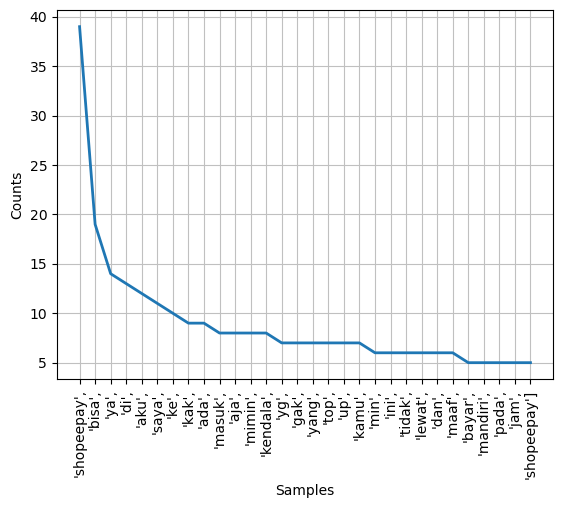

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt #matplotlib adalah library
fdist.plot(30,cumulative=False)
plt.show()

FILTERING

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from itertools import chain

# baca file stopword_indo_twitter.csv
stw = pd.read_csv('stopword_indo_twitter.csv', header=None)

# gabungkan stopword dari corpus NLTK dengan stopword dari file CSV
stop_words = set(stopwords.words('indonesian'))
stop_words.update(stw[0].tolist())

def remove_stopwords(text):
    # memecah teks menjadi kata-kata
    text = ' '.join(text)
    words = text.split()
    # menghapus stopword dari setiap kata
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # mengembalikan daftar kata-kata yang telah difilter
    return filtered_words

# contoh penggunaan
df['Text'] = df['Text'].apply(remove_stopwords)
output = list(set(chain.from_iterable(df['Text'].tolist())))
print(output)

['mahal', 'pst', 'hai', 'sinyal', 'yaa', 'gitu', 'disembunyiin', 'dukung', 'easier', 'zdhca', 'jugakan', 'cicilan', 'hihii', 'beli', 'httpstcopudganbke', 'screenshot', 'jam', 'and', 'saldo', 'koin', 'shopeepayku', 'sp', 'stabil', 'my', 'butuh', 'terpotong', 'hello', 'sdh', 'lanjuti', 'simple', 'masi', 'dii', 'linkaja', 'httpstcontxrrpgrpu', 'bilang', 'httpstcotwhltfmxdy', 'tweet', 'rb', 'meningkat', 'gede', 'latter', 'bibit', 'beneran', 'tunggu', 'rp', 'bonus', 'mam', 'httpstcolnxuudn', 'enak', 'admin', 'bukti', 'sarankan', 'tf', 'kack', 'karna', 'alami', 'dapet', 'rekening', 'twitter', 'shopeepay', 'httpstcocwlzjkvwb', 'done', 'hidupnya', 'ribet', 'atm', 'terima', 'pake', 'tranfer', 'nomor', 'fuh', 'happy', 'harga', 'bantu', 'dibatasi', 'stay', 'nyiapin', 'praktis', 'baju', 'top', 'nie', 'bleh', 'layanan', 'pembelian', 'harganya', 'terimakasih', 'gangguan', 'ki', 'kertas', 'sore', 'gagal', 'transaksinya', 'kendala', 'hemat', 'pas', 'introvert', 'masuk²', 'literally', 'resah', 'sehat',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nauvalia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


STEMMING

In [ ]:
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
df['Text'] = df['Text'].apply(stemming)
df.head()

selamat bayar makananminuman rangkai restorasi ka cashless qris shopeepay linkaja terima kasih
isi shopeepay kena biaya admin alfaampidm dll
saldo shopeepay
bayar layan httpstcodthfvus
balas email isi saldo shopeepay mesin atm mandiri status gagal jam saldo mandiri potong akun shopeepay uang bukti kertas transaksi gagal
latter mamin cicil nyicil mam riba gede gede
belanja indomaret pakai shopeepay
hello isi shopeepay atm mandiri transaksi gagal saldo shopeepay uang debit potong mohon tindak lanjut
blm masuk transferanny shopeepay rekening
kack bayar shopeepay kack
transaksi
buka dapet shopeepay lumayan beli baju lebaran hihii klik httpstcoptybjtc pake kode dapet bonus shopeepay zdhca httpstcoexmiahwi
tranfer rekening shopeepay koq blm ganggu tlg direspon
pake shopeepay dapet cashback koin gratis
beli rb shopeepay
pake shopeepay my
anak introvert pake shopeepay kontak nerima trus rumah
sore shopeepayku bilang shopeepay feelingku enak payment shopeepay nariknya butuh menit situ sore sada

,Datetime,Tweet ID,Text,Username,Label
21,2023-03-22 19:09:21+00:00,1.640000e+18,selamat bayar makananminuman rangkai restorasi...,KAI121,positif
42,2023-03-22 16:18:48+00:00,1.640000e+18,isi shopeepay kena biaya admin alfaampidm dll,teh_khory,negatif
51,2023-03-22 15:54:18+00:00,1.640000e+18,saldo shopeepay,njaemcty,positif
62,2023-03-22 15:07:09+00:00,1.640000e+18,bayar layan httpstcodthfvus,Economicreview_,positif
86,2023-03-22 14:03:53+00:00,1.640000e+18,balas email isi saldo shopeepay mesin atm mand...,oppasmile,negatif


In [ ]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [ ]:
# get the percentage of positive tweets
pt = df[df.Label == 'positif']
pt = pt['Text']

round((pt.shape[0] / df.shape[0])*100, 1)

67.4

In [ ]:
#get the percentage of negative tweets
pt = df[df.Label == 'negatif']
pt = pt['Text']

round((pt.shape[0] / df.shape[0])*100, 1)

32.6

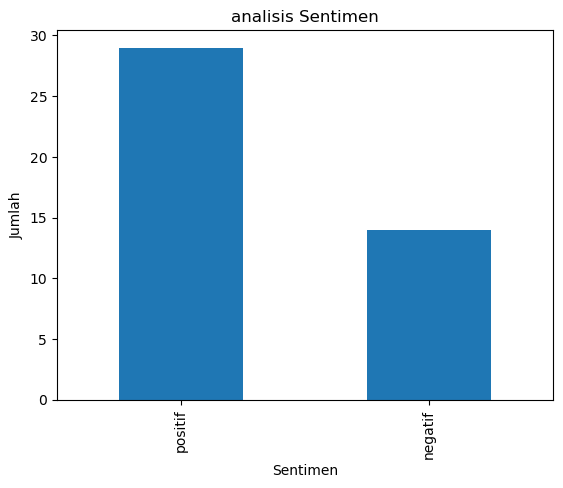

In [ ]:
# Show the value counts

df['Label'].value_counts()

#plot and visualize the counts
plt.title('analisis Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
df['Label'].value_counts().plot(kind='bar')
plt.show()

PEMODELAN

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
df = df.astype({'Label' : 'category'})
df = df.astype({'Text' : 'string'})
df.dtypes

Datetime      object
Tweet ID     float64
Text          string
Username      object
Label       category
dtype: object

In [ ]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df['Text'].astype('U'))
print(text_tf)

  (0, 99)	0.3210793293737924
  (0, 202)	0.2666787128001786
  (0, 120)	0.3210793293737924
  (0, 187)	0.08596377622509567
  (0, 166)	0.2666787128001786
  (0, 33)	0.3210793293737924
  (0, 92)	0.2892570086621185
  (0, 173)	0.3210793293737924
  (0, 167)	0.3210793293737924
  (0, 129)	0.3210793293737924
  (0, 17)	0.21227809622656474
  (0, 185)	0.3210793293737924
  (1, 43)	0.4198163039234352
  (1, 3)	0.4198163039234352
  (1, 0)	0.4198163039234352
  (1, 21)	0.4198163039234352
  (1, 100)	0.4198163039234352
  (1, 88)	0.32578799872730346
  (1, 187)	0.11239899770722095
  (2, 179)	0.9390703234330532
  (2, 187)	0.3437250756743548
  (3, 74)	0.640564532781318
  (3, 115)	0.640564532781318
  (3, 17)	0.4235022534595342
  (4, 214)	0.17237216839599637
  :	:
  (41, 89)	0.23282688990102282
  (41, 131)	0.23282688990102282
  (41, 207)	0.23282688990102282
  (41, 125)	0.23282688990102282
  (41, 224)	0.15393095854203337
  (41, 212)	0.15393095854203337
  (41, 9)	0.1933789242215281
  (41, 187)	0.062335618744662105
 

In [ ]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# compute similarity using cosine similarity
cossim=cosine_similarity(text_tf, text_tf)

print(cossim)

[[1.         0.00966224 0.02954791 ... 0.01355423 0.00535861 0.04985399]
 [0.00966224 1.         0.03863435 ... 0.01772237 0.00700646 0.00613575]
 [0.02954791 0.03863435 1.         ... 0.05419643 0.02142632 0.01876362]
 ...
 [0.01355423 0.01772237 0.05419643 ... 1.         0.00982869 0.00860726]
 [0.00535861 0.00700646 0.02142632 ... 0.00982869 1.         0.04193102]
 [0.04985399 0.00613575 0.01876362 ... 0.00860726 0.04193102 1.        ]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cossim, df['Label'], test_size=0.2, random_state=43)
print(X_test)
print(y_test)

[[0.01355423 0.01772237 0.05419643 0.         0.01989618 0.
  1.         0.02692163 0.02272305 0.01988075 0.         0.02136477
  0.01662021 0.02146981 0.03262859 0.03387469 0.01649082 0.02172469
  0.02932926 0.         0.04077836 0.02162339 0.02540317 0.04077836
  0.01988582 0.01798976 0.01874505 0.02272305 0.15767378 0.01789579
  0.01215358 0.01287484 0.0130201  0.01162351 0.00930643 0.01129563
  0.0130201  0.02063954 0.01250861 0.01066016 0.30634635 0.00982869
  0.00860726]
 [0.00615838 0.00805218 0.0246242  0.         0.09395294 0.
  0.01129563 0.05788143 0.01032424 0.00903284 0.19572121 0.00970711
  0.00755141 0.00975483 0.01482483 0.015391   0.00749262 0.00987063
  0.01332578 0.         0.01852769 0.00982461 0.01154196 0.01852769
  0.00903514 0.00817366 0.00851683 0.01032424 0.07163924 0.10729444
  0.32120341 0.24307568 0.00591569 0.60616597 0.13839775 1.
  0.00591569 0.17682942 0.19906754 0.04099519 0.01129563 0.05892806
  0.00391072]
 [0.01778911 0.02325955 0.07112955 0.       

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array(['positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'negatif'], dtype='<U7')

VISUALISASI DATA

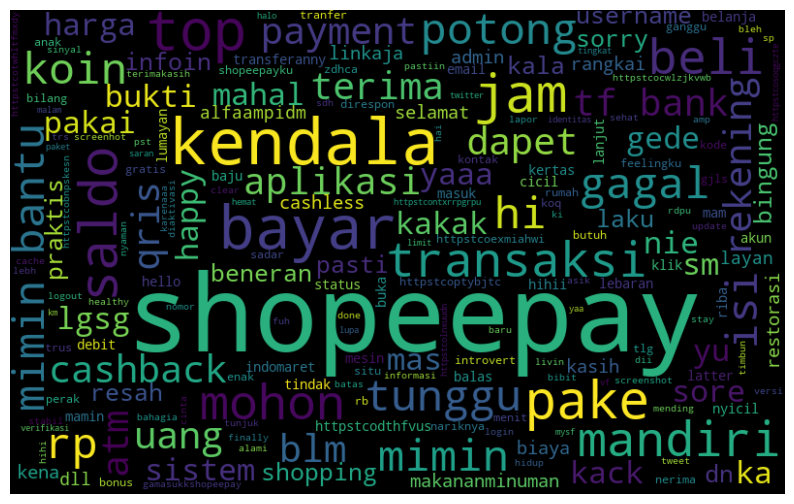

In [ ]:
from wordcloud import WordCloud
# Plot the word cloud
allwords = ' '.join( [twts for twts in df['Text']] )
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allwords)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

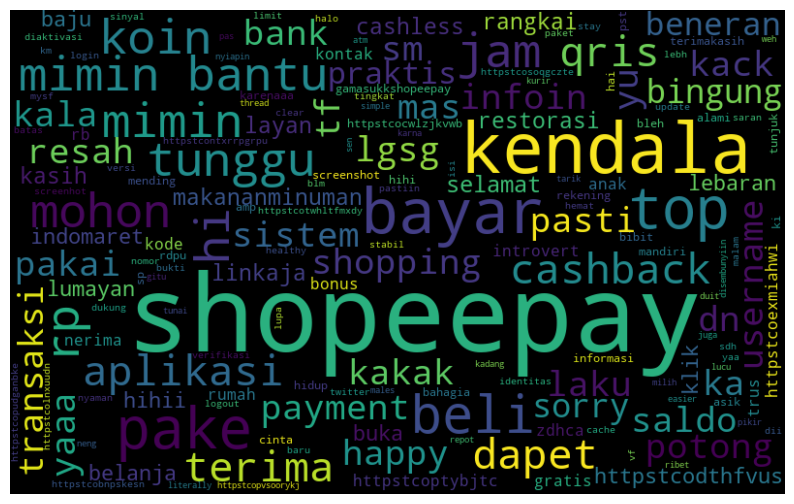

In [ ]:
from wordcloud import WordCloud
# Plot the word cloud
allwords = ' '.join([text for text in df['Text'][df['Label'] == 'positif']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allwords)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

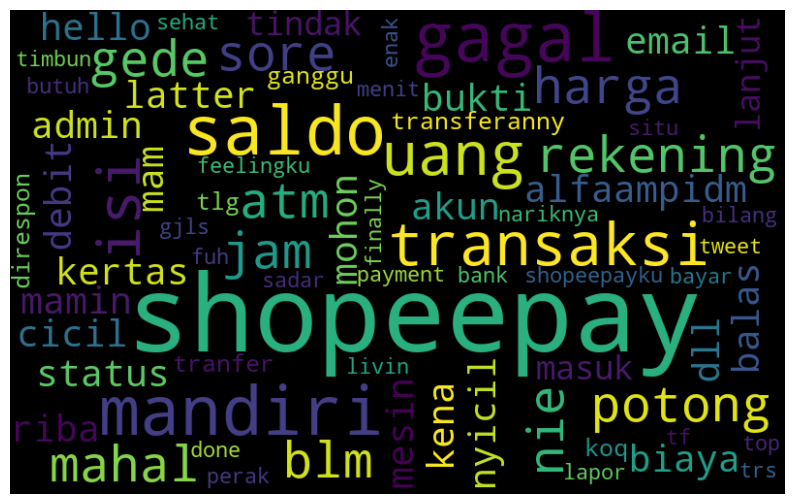

In [ ]:
from wordcloud import WordCloud
# Plot the word cloud
allwords = ' '.join([text for text in df['Text'][df['Label'] == 'negatif']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allwords)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

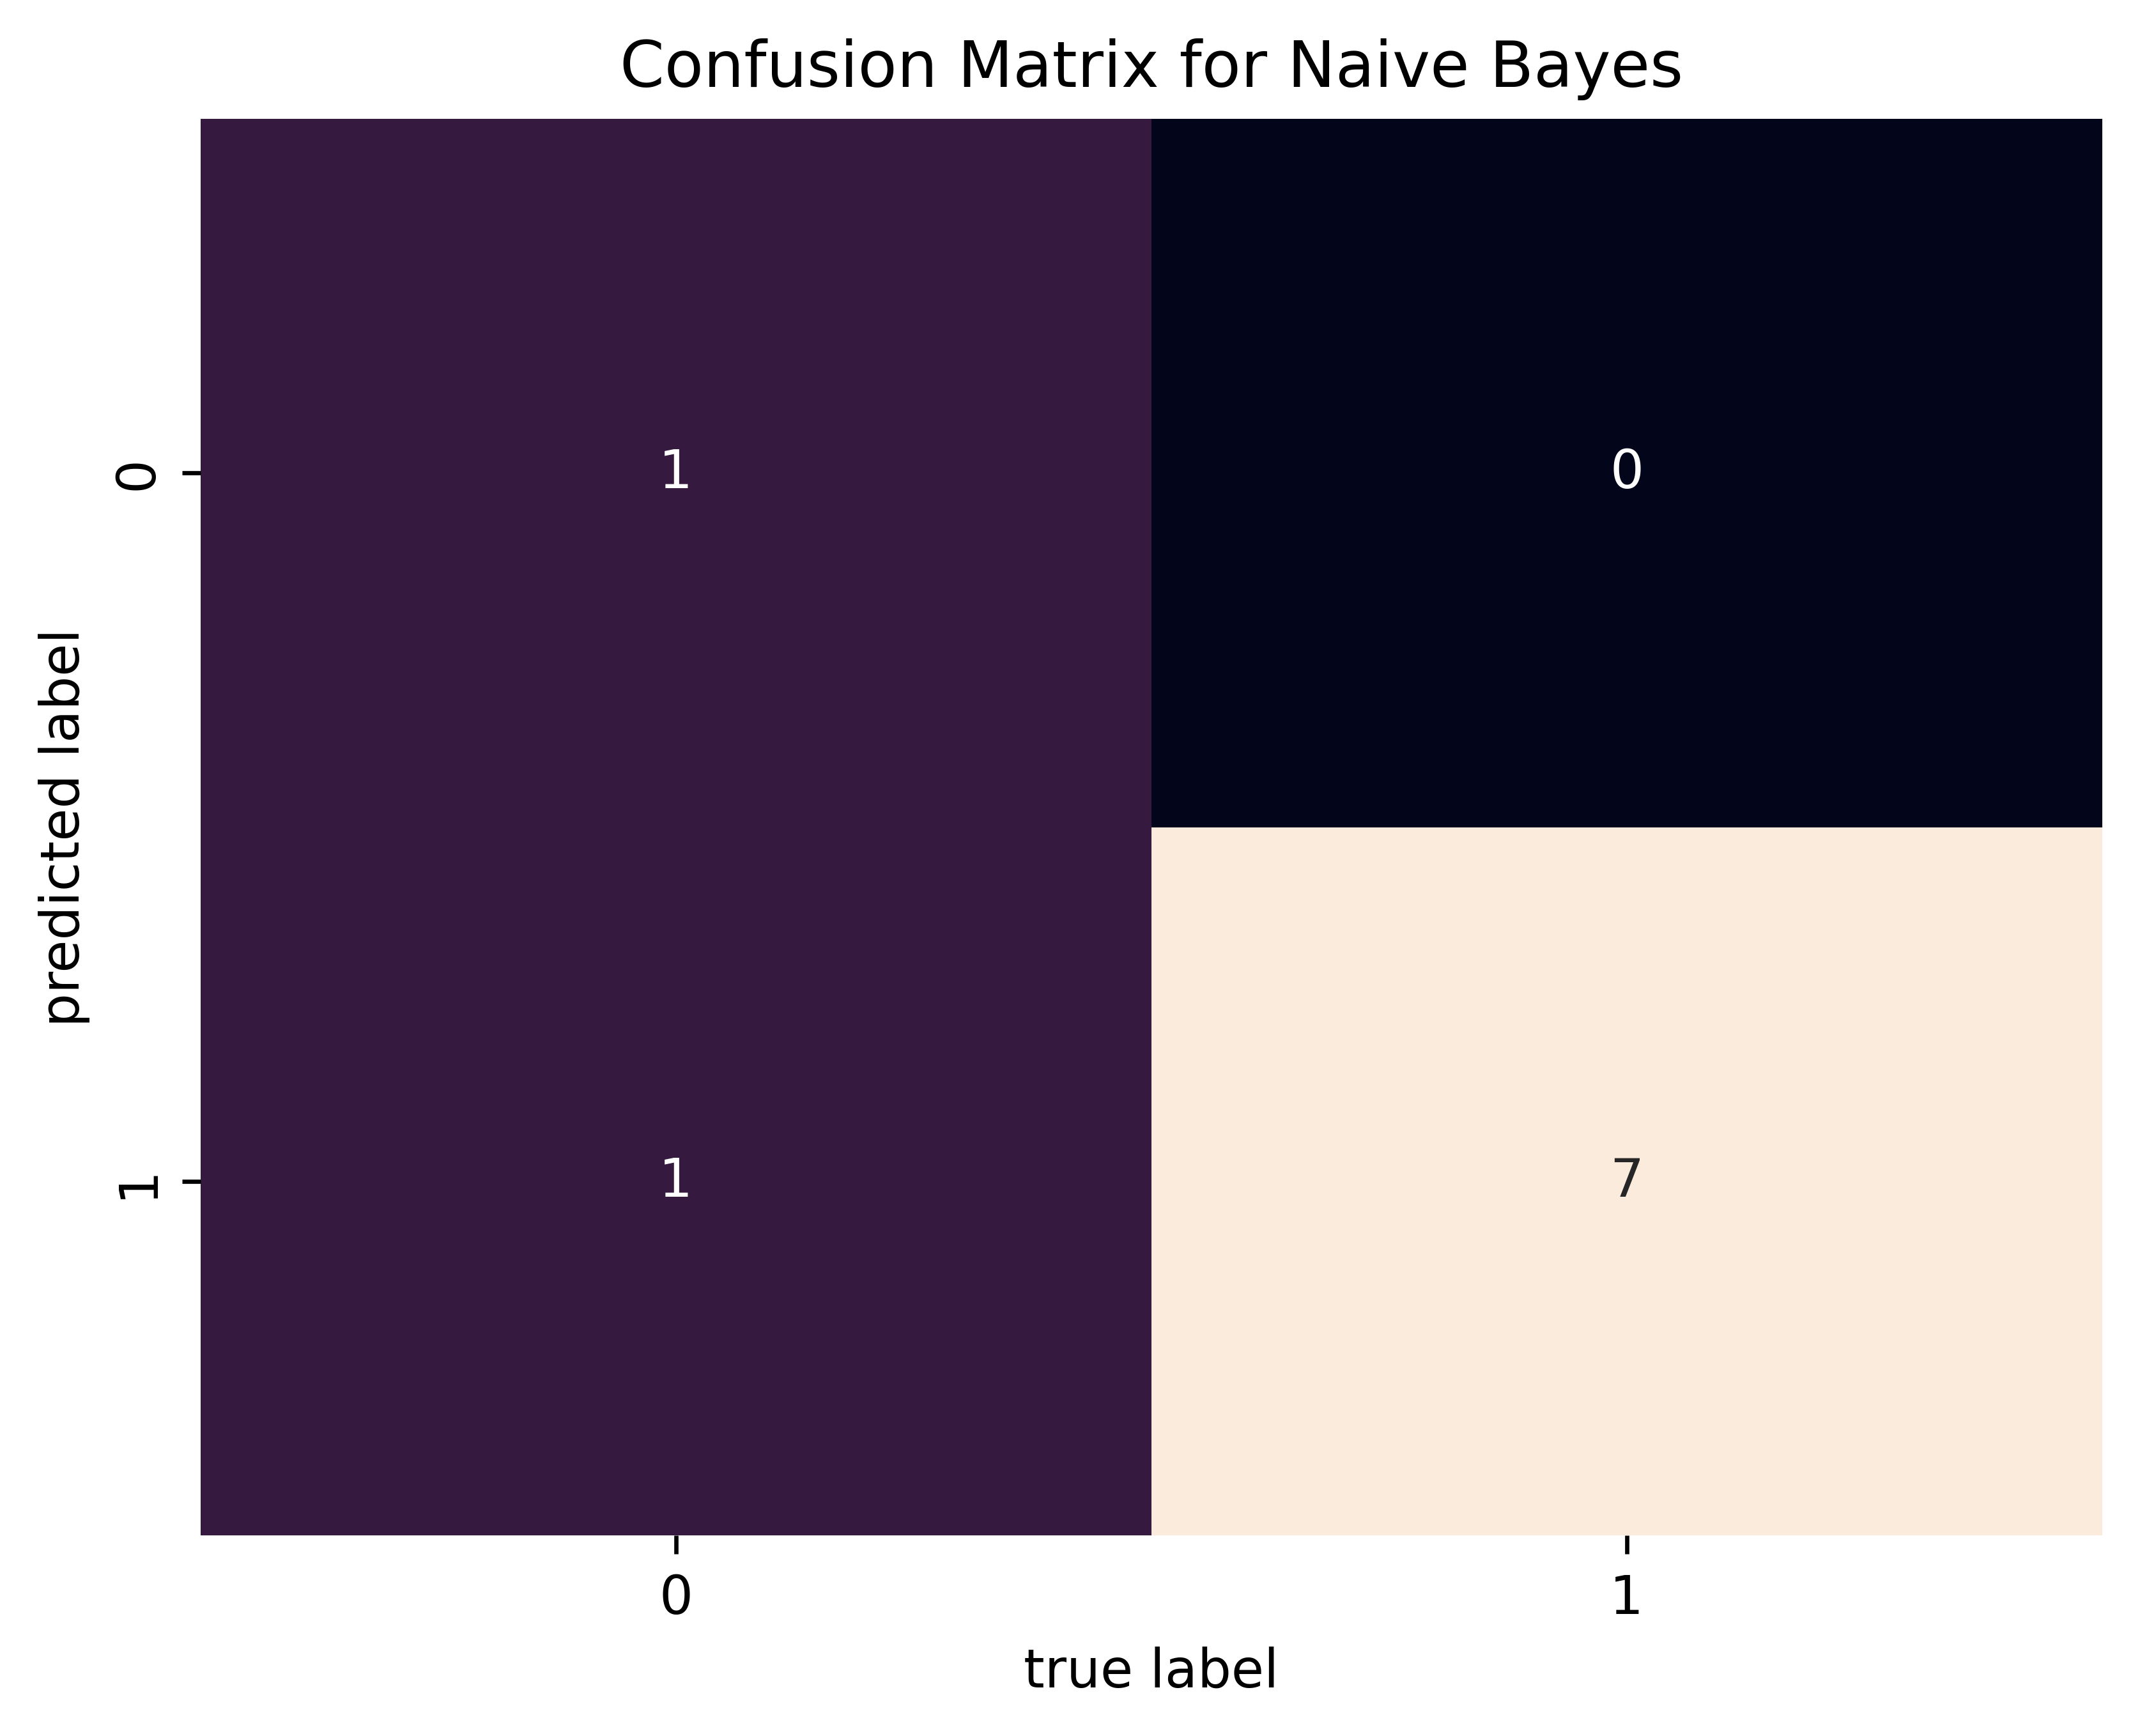

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary", pos_label="negatif")
recall = recall_score(y_test, y_pred, average="binary", pos_label="negatif")
f1 = f1_score(y_test, y_pred, average="binary", pos_label="negatif")

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.8888888888888888
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary", pos_label="negatif")
recall = recall_score(y_test, y_pred, average="binary", pos_label="negatif")
f1 = f1_score(y_test, y_pred, average="binary", pos_label="negatif")

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

print(f'confussion matrix:\n {confusion_matrix(y_test, y_pred)}')
print('===========================================================\n')
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8888888888888888
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666
confussion matrix:
 [[1 1]
 [0 7]]

              precision    recall  f1-score   support

     negatif       1.00      0.50      0.67         2
     positif       0.88      1.00      0.93         7

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
teks = "ShopeePay bagus"
teks_vector = vectorizer.transform([teks])
print(nb.predict(teks_vector))

ValueError: X has 235 features, but MultinomialNB is expecting 43 features as input.